_"practice makes better"_

#### Imports and settings

In [2]:
import pandas as pd
import numpy as np
import datetime as dt

import warnings
warnings.filterwarnings("ignore")

#### Loading the Data

In [3]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')

In [4]:
#first 2 rows
df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6


#### About the Data

In [5]:
#rows, cols
df.shape

(1000, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [7]:
#mem used by i & each col
df.memory_usage(deep=True)

Index                        128
Invoice ID                 68000
Branch                     58000
City                       64648
Customer type              63000
Gender                     62002
Product line               75540
Unit price                  8000
Quantity                    8000
Tax 5%                      8000
Total                       8000
Date                       65677
Time                       62000
Payment                    64212
cogs                        8000
gross margin percentage     8000
gross income                8000
Rating                      8000
dtype: int64

In [8]:
#total mem used
df.memory_usage(deep=True).sum()

647207

In [9]:
#descriptive stat of numeric cols, transpose cols
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,26.494628,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,245.885335,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,234.176510,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,0.000000,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580,4.000000,5.500000,7.000000,8.500000,10.000000


In [10]:
#descriptive stats of str cols
df.describe(include='object')

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,6,89,506,3
top,750-67-8428,A,Yangon,Member,Female,Fashion accessories,2/7/2019,19:48,Ewallet
freq,1,340,340,501,501,178,20,7,345


#### Tidy up

In [11]:
#missing values
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [12]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [13]:
#clean columns, change case and remove whitespace
df.columns = [x.lower().replace(" ","_") for x in df.columns]

In [14]:
#convert date col from str
df['date'] = pd.to_datetime(df['date'])

In [15]:
#sort by date, new index
df.sort_values(by='date', inplace=True, ignore_index=True)

#### Values in Str cols

In [16]:
df.columns

Index(['invoice_id', 'branch', 'city', 'customer_type', 'gender',
       'product_line', 'unit_price', 'quantity', 'tax_5%', 'total', 'date',
       'time', 'payment', 'cogs', 'gross_margin_percentage', 'gross_income',
       'rating'],
      dtype='object')

In [17]:
df.product_line.unique()

array(['Food and beverages', 'Fashion accessories', 'Home and lifestyle',
       'Sports and travel', 'Health and beauty', 'Electronic accessories'],
      dtype=object)

In [18]:
df.customer_type.unique()

array(['Normal', 'Member'], dtype=object)

In [19]:
df.branch.unique()

array(['B', 'A', 'C'], dtype=object)

In [20]:
df.city.unique()

array(['Mandalay', 'Yangon', 'Naypyitaw'], dtype=object)

In [21]:
df.payment.unique()

array(['Cash', 'Ewallet', 'Credit card'], dtype=object)

#### Sales Overview

In [22]:
#5 transactions with highest totals
(df
 .groupby('invoice_id')['total'].sum()
 .sort_values(ascending=False)
 .reset_index()
 .head(5)
)

,invoice_id,total
0,860-79-0874,1042.65
1,687-47-8271,1039.29
2,283-26-5248,1034.46
3,751-41-9720,1023.75
4,303-96-2227,1022.49


In [23]:
#units and revenue per product line
(df
 .rename(columns={'quantity':'units_sold','total':'sales_revenue'})
 .groupby('product_line')[['units_sold','sales_revenue']].sum()
 .reset_index()
 .style.format({"sales_revenue":"${:,.2f}"})
 .set_caption('Units Sold and Total Revenue Made from Each Product Line')
 .background_gradient(subset='sales_revenue', cmap='BuGn')
 .hide_index()
)

product_line,units_sold,sales_revenue
Electronic accessories,971,"$54,337.53"
Fashion accessories,902,"$54,305.89"
Food and beverages,952,"$56,144.84"
Health and beauty,854,"$49,193.74"
Home and lifestyle,911,"$53,861.91"
Sports and travel,920,"$55,122.83"


In [24]:
df.groupby('product_line')['unit_price'].min()

product_line
Electronic accessories   10.56
Fashion accessories      10.18
Food and beverages       10.13
Health and beauty        10.08
Home and lifestyle       10.53
Sports and travel        10.17
Name: unit_price, dtype: float64

In [25]:
df.groupby('product_line')['unit_price'].max()

product_line
Electronic accessories   99.73
Fashion accessories      99.89
Food and beverages       99.79
Health and beauty        99.96
Home and lifestyle       99.92
Sports and travel        99.96
Name: unit_price, dtype: float64

In [26]:
#Revenue from each city
(df
 .groupby('city')['total'].sum()
 .reset_index()
 .sort_values(by='total', ascending=False, ignore_index=True)
 .style.format({"total":"${:,.2f}"})
 .set_caption('Total Revenue in Each City')
 .hide_index()
)

city,total
Naypyitaw,"$110,568.71"
Yangon,"$106,200.37"
Mandalay,"$106,197.67"


In [27]:
#Revenue from branch
(df
 .groupby('branch')['total'].sum()
 .reset_index()
 .sort_values(by='total', ascending=False, ignore_index=True)
 .style.format({"total":"${:,.2f}"})
 .set_caption('Total Revenue From Branches')
 .hide_index()
)

branch,total
C,"$110,568.71"
A,"$106,200.37"
B,"$106,197.67"


In [28]:
#years in the df
df['date'].dt.year.unique()

array([2019], dtype=int64)

In [29]:
#months in the df
df['date'].dt.month_name().unique()

array(['January', 'February', 'March'], dtype=object)

The supermarket sales data covers transactions made in January 2019, February 2019 & March 2019

In [30]:
#total revenue generated
print(f'The total revenue generated for the period is ${df.total.sum().round(2)}')

The total revenue generated for the period is $322966.75


In [31]:
#monthly totals
(df
 .groupby(df['date'].dt.month_name())['total'].sum()
 .sort_values(ascending=False)
 .reset_index()
)

,date,total
0,January,116291.87
1,March,109455.51
2,February,97219.37


In [32]:
#to isolate january sales
(df
 .query('date.dt.month_name() == "January"')
 .total.sum().round(2)
)

116291.87

In [33]:
#weekly totals with lowest and highest performing weeks highlighted
(df
 .groupby(pd.Grouper(key='date', freq='1W'))['total'].sum()
 .reset_index()
 .style.format({"total":"${:,.2f}"})
 .highlight_min(subset='total',color='red')
 .highlight_max(subset='total',color='green')
 .set_caption('Weekly Sale Totals')
)

,date,total
0,2019-01-06 00:00:00,"$17,543.39"
1,2019-01-13 00:00:00,"$24,461.20"
2,2019-01-20 00:00:00,"$28,693.36"
3,2019-01-27 00:00:00,"$29,286.88"
4,2019-02-03 00:00:00,"$28,360.45"
5,2019-02-10 00:00:00,"$27,101.83"
6,2019-02-17 00:00:00,"$25,563.59"
7,2019-02-24 00:00:00,"$17,328.66"
8,2019-03-03 00:00:00,"$29,219.72"
9,2019-03-10 00:00:00,"$28,418.84"


_week 8 had the lowest totals while week 4 had the highest_

In [34]:
#daily totals
(df
 .groupby(pd.Grouper(key='date', freq='1D'))['total']
 .sum()
 .reset_index()
 .style.format({"total":"${:,.2f}"})
 .background_gradient(subset='total', cmap='Blues')
 .set_caption('Daily Sale Totals')
 .hide_index()
)

date,total
2019-01-01 00:00:00,"$4,745.18"
2019-01-02 00:00:00,"$1,945.50"
2019-01-03 00:00:00,"$2,078.13"
2019-01-04 00:00:00,"$1,623.69"
2019-01-05 00:00:00,"$3,536.68"
2019-01-06 00:00:00,"$3,614.20"
2019-01-07 00:00:00,"$2,834.24"
2019-01-08 00:00:00,"$5,293.73"
2019-01-09 00:00:00,"$3,021.34"
2019-01-10 00:00:00,"$3,560.95"


In [35]:
#5 days with highest totals
(df
 .groupby(pd.Grouper(key='date', freq='1D'))['total'].sum()
 .sort_values(ascending=False)
 .reset_index()
 .head(5)
)

,date,total
0,2019-03-09,7474.05
1,2019-02-07,7228.21
2,2019-03-14,7214.63
3,2019-02-15,6830.79
4,2019-03-02,6560.31


In [36]:
#5 days with lowesest totals
(df
 .groupby(pd.Grouper(key='date', freq='1D'))['total'].sum()
 .sort_values(ascending=False)
 .reset_index()
 .tail(5)
)

,date,total
84,2019-02-18,1496.03
85,2019-03-07,1438.26
86,2019-02-21,1393.74
87,2019-03-18,1292.83
88,2019-02-13,934.24


In [37]:
#15 dates with most purchases/transactions
df['date'].value_counts().head(15)

2019-02-07    20
2019-02-15    19
2019-03-02    18
2019-01-08    18
2019-03-14    18
2019-03-05    17
2019-01-26    17
2019-01-25    17
2019-01-23    17
2019-02-25    16
2019-03-09    16
2019-03-19    16
2019-01-19    16
2019-03-20    15
2019-02-27    14
Name: date, dtype: int64

In [38]:
#how purchases are distributed based on the day of the week
df['date'].dt.day_name().value_counts()

Saturday     164
Tuesday      158
Wednesday    143
Friday       139
Thursday     138
Sunday       133
Monday       125
Name: date, dtype: int64

_164 purchases were made on a Saturday_

In [39]:
#pivot table with totals as values, weeks as column, day name as index, NaN to 0
#show max and min for each week
(pd
 .pivot_table(df,'total', 
              index=df['date'].dt.day_name(), 
              columns=pd.Grouper(key='date', freq='1W'), 
              aggfunc=np.sum, 
              fill_value=0)
 .style.format()
 .set_caption('Daily revenue (in $). Each column represents a week in the select period, minimum and maximum for each week highlighted')
 .highlight_min(color='dimgrey')
 .highlight_max(color='black'))

date,2019-01-06 00:00:00,2019-01-13 00:00:00,2019-01-20 00:00:00,2019-01-27 00:00:00,2019-02-03 00:00:00,2019-02-10 00:00:00,2019-02-17 00:00:00,2019-02-24 00:00:00,2019-03-03 00:00:00,2019-03-10 00:00:00,2019-03-17 00:00:00,2019-03-24 00:00:00,2019-03-31 00:00:00
date,,,,,,,,,,,,,
Friday,1623.688500,2114.962500,2780.473500,4700.367000,2444.536500,5084.656500,6830.785500,2442.310500,2634.366000,3125.388000,2942.415000,3179.148000,4023.243000
Monday,0.000000,2834.244000,3966.616500,2392.099500,4999.711500,2439.496500,4542.153000,1496.029500,4807.236000,3894.439500,2961.252000,1292.833500,2272.966500
Saturday,3536.683500,5184.763500,4914.724500,4457.512500,4140.948000,3271.894500,2503.767000,2339.589000,6560.305500,7474.047000,3154.473000,4095.042000,4487.059500
Sunday,3614.205000,2451.204000,3655.449000,4635.897000,5467.927500,3141.022500,5299.570500,2722.461000,4853.173500,3163.230000,1976.289000,3477.463500,0.000000
Thursday,2078.128500,3560.949000,3142.755000,5402.050500,5232.496500,7228.210500,2454.091500,1393.738500,2097.018000,1438.258500,7214.634000,1877.515500,2229.402000
Tuesday,4745.181000,5293.732500,5944.260000,1704.769500,3516.565500,3031.129500,2998.989000,4228.119000,2408.164500,6230.878500,3677.551500,5740.392000,1962.513000
Wednesday,1945.503000,3021.343500,4289.082000,5994.187500,2558.262000,2905.423500,934.237500,2706.417000,5859.451500,3092.596500,2063.607000,5458.204500,2902.819500


In [40]:
#total revenue based on the day of the week
(df
 .groupby(df['date'].dt.day_name())['total'].sum()
 .reset_index()
 .style.format({"total":"${}"})
 .background_gradient(subset='total', cmap='Blues')
 .hide_index()
)

date,total
Friday,$43926.3405
Monday,$37899.078
Saturday,$56120.8095
Sunday,$44457.8925
Thursday,$45349.248
Tuesday,$51482.2455
Wednesday,$43731.135


#### Customers

In [41]:
#based on purchases most customers are from
df.city.value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: city, dtype: int64

In [42]:
#transactions based on customer type
df.customer_type.value_counts()

Member    501
Normal    499
Name: customer_type, dtype: int64

In [43]:
#total revenue by customer type
(df
 .groupby('customer_type')['total'].sum()
 .reset_index()
)

,customer_type,total
0,Member,164223.44
1,Normal,158743.30


In [44]:
#transactions based on customer gender
df.gender.value_counts()

Female    501
Male      499
Name: gender, dtype: int64

In [45]:
#total revenue by customer type
(df
 .groupby('gender')['total'].sum()
 .reset_index()
)

,gender,total
0,Female,167882.92
1,Male,155083.82


In [46]:
filter_fem = 'Female'
filter_male = 'Male'

In [47]:
#total purchases of product types bought by female customers 
(df
 .query('gender == @filter_fem')
 .product_line.value_counts()
)

Fashion accessories       96
Food and beverages        90
Sports and travel         88
Electronic accessories    84
Home and lifestyle        79
Health and beauty         64
Name: product_line, dtype: int64

_96 purchases made by female customers were fashion accessories_

In [48]:
#The units they purchased for those products
(df
 .query('gender == @filter_fem')
 .groupby('product_line')['quantity'].sum().sort_values(ascending=False)
)

product_line
Fashion accessories       530
Food and beverages        514
Home and lifestyle        498
Sports and travel         496
Electronic accessories    488
Health and beauty         343
Name: quantity, dtype: int64

_530 units of fashion accessories were sold to female customers_

In [49]:
#unique purchases by male customers
(df
 .query('gender == @filter_male')
 .product_line.value_counts().sort_values(ascending=False)
)

Health and beauty         88
Electronic accessories    86
Food and beverages        84
Fashion accessories       82
Home and lifestyle        81
Sports and travel         78
Name: product_line, dtype: int64

In [50]:
#The units they purchased for those products
(df
 .query('gender == @filter_male')
 .groupby('product_line')['quantity'].sum().sort_values(ascending=False)
)

product_line
Health and beauty         511
Electronic accessories    483
Food and beverages        438
Sports and travel         424
Home and lifestyle        413
Fashion accessories       372
Name: quantity, dtype: int64

In [51]:
(df
 .groupby('city')[['gender','product_line']].value_counts().reset_index()
)

,city,gender,product_line,0
0,Mandalay,Male,Health and beauty,33
1,Mandalay,Female,Fashion accessories,33
2,Mandalay,Male,Sports and travel,32
3,Mandalay,Female,Sports and travel,30
4,Mandalay,Male,Fashion accessories,29
5,Mandalay,Female,Food and beverages,29
6,Mandalay,Female,Electronic accessories,28
7,Mandalay,Male,Home and lifestyle,28
8,Mandalay,Male,Electronic accessories,27
9,Mandalay,Female,Home and lifestyle,22


#### Means of Payment

In [52]:
df.payment.value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: payment, dtype: int64

In [53]:
df.groupby('payment')['total'].sum()

payment
Cash          112206.57
Credit card   100767.07
Ewallet       109993.11
Name: total, dtype: float64

#### Visualizations

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

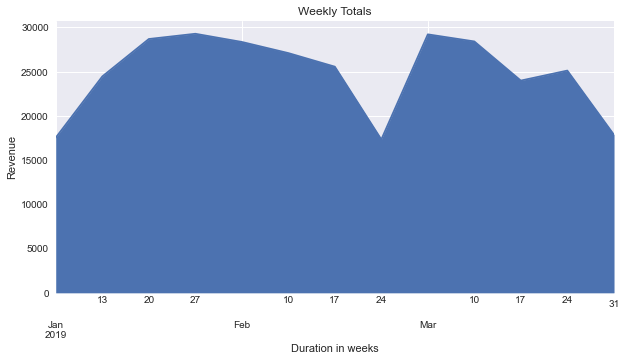

In [55]:
df.groupby(pd.Grouper(key='date', freq='1W'))['total'].sum().plot.area(
     plt.style.use('seaborn'),
     plt.figure(figsize=(10,5)),
     title='Weekly Totals',
     ylabel='Revenue',
     xlabel='Duration in weeks'
)
plt.show()

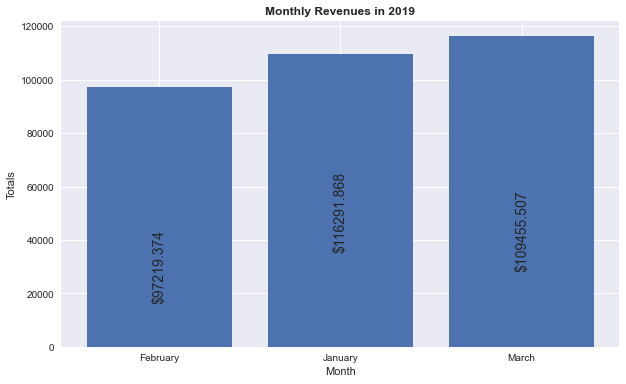

In [56]:
monthsales = df.groupby(df['date'].dt.month_name())['total'].sum().reset_index()

plt.figure(figsize=(10,6))
plt.bar(monthsales['date'], monthsales['total'].sort_values())
plt.title('Monthly Revenues in 2019', fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Totals')

for i, v in monthsales['total'].items():
    plt.text(i, v-80000,'$'+str(v), 
             rotation='vertical', ha='center', fontsize=14
            )
plt.show()

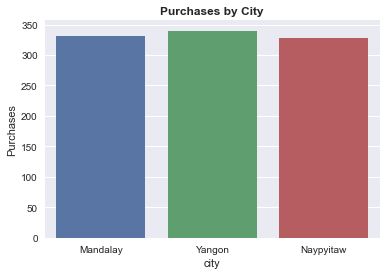

In [57]:
sns.countplot(x=df['city']) 
plt.title('Purchases by City', fontweight='bold')
plt.ylabel('Purchases')
plt.show()

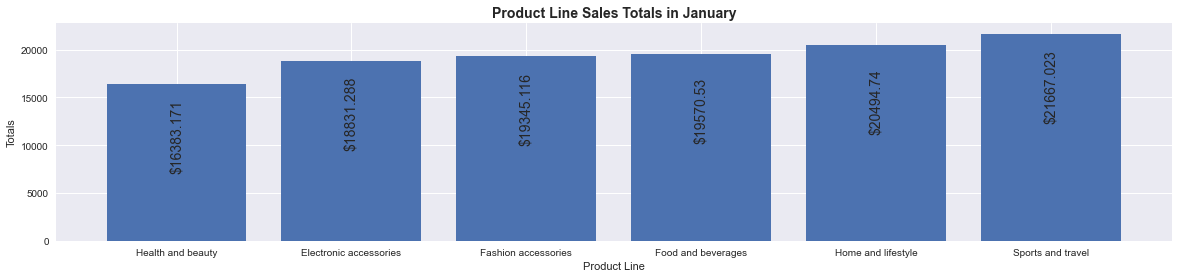

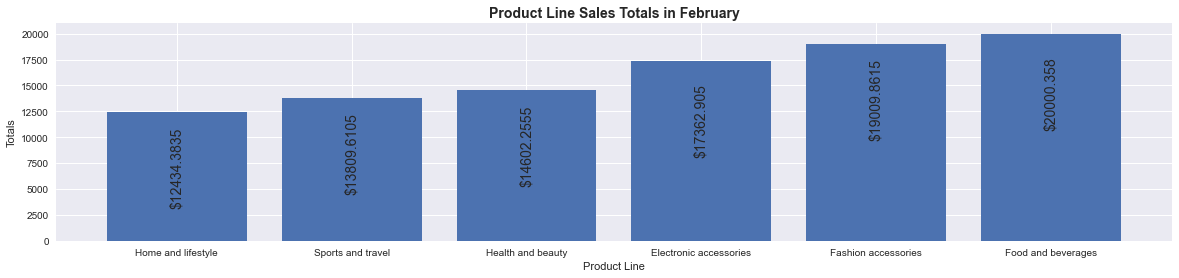

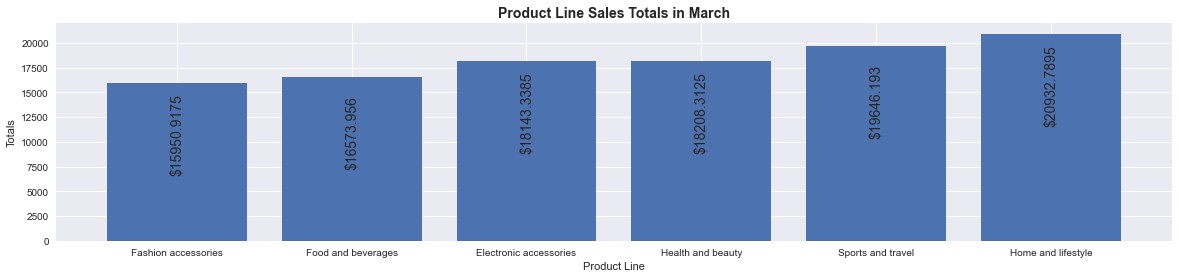

In [58]:
#jan product sales
products = df.query('date.dt.month_name() == "January"').groupby('product_line')[['quantity','total']].sum().sort_values(by='total').reset_index()

plt.figure(figsize=(20,4))
plt.title('Product Line Sales Totals in January', fontweight='bold', fontsize=14)
plt.bar(products['product_line'], products['total'])
plt.xlabel('Product Line')
plt.ylabel('Totals')

for i, v in products['total'].items():
    plt.text(i, v-9000, '$'+str(v), 
             rotation='vertical', ha='center', fontsize=14)
plt.show()

#feb product sales
products = df.query('date.dt.month_name() == "February"').groupby('product_line')[['quantity','total']].sum().sort_values(by='total').reset_index()

plt.figure(figsize=(20,4))
plt.title('Product Line Sales Totals in February', fontweight='bold', fontsize=14)
plt.bar(products['product_line'], products['total'])
plt.xlabel('Product Line')
plt.ylabel('Totals')

for i, v in products['total'].items():
    plt.text(i, v-9000, '$'+str(v), 
             rotation='vertical', ha='center', fontsize=14)
plt.show()

#march product sales
products = df.query('date.dt.month_name() == "March"').groupby('product_line')[['quantity','total']].sum().sort_values(by='total').reset_index()

plt.figure(figsize=(20,4))
plt.title('Product Line Sales Totals in March', fontweight='bold', fontsize=14)
plt.bar(products['product_line'], products['total'])
plt.xlabel('Product Line')
plt.ylabel('Totals')

for i, v in products['total'].items():
    plt.text(i, v-9000, '$'+str(v), 
             rotation='vertical', ha='center', fontsize=14)
plt.show()

###### _note: consider use of a function|loop to create subplots for each month_